<a href="https://colab.research.google.com/github/jeanpadrao/ChallengeAluraVoz/blob/main/Challenge_Alura_Voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O challenge

O challenge é para resolver um problema da compahia fictícia Alura Voz, que presta de serviço de planos de telefonia e internet. O desafio geral consiste em reduzir a taxa de evasão dos clientes.

##Primeira semana do challenge

As atividades da primeira semana são:

1.   Entender quais informações o conjunto de dados possui;
2.   Analisar quais os tipos de dados;
3.   Verificar quais são as inconsistências nos dados;
4.   Corrigir as inconsistências.

Além disso, temos algumas atividades opcionais:

*   Traduzir as colunas e dados;
*   Criar coluna de contas diárias.

###Importando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
URI = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
df = pd.read_json(path_or_buf = URI)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Tratamento dos dados

#####Tabela Customer

In [3]:
df_customer = pd.json_normalize(data = df.customer)
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


#####Tabela Phone

In [4]:
df_phone = pd.json_normalize(data = df.phone)
df_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


#####Tabela Internet

In [5]:
df_internet = pd.json_normalize(data = df.internet)
df_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


#####Tabela account

In [6]:
df_account = pd.json_normalize(data = df.account)
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


#####Tabela original

In [7]:
df = df[['customerID', 'Churn']]
df.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


#####Juntando os um único dataframe

In [8]:
dados = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis = 1)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###1. Entendendo quais informações o conjunto de dados possui

In [9]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
dados.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

###2. Analisando os tipos dos dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Traduzindo as colunas

In [12]:
# Tradução das colunas
dados.rename(columns = {
    'customerID' : 'ID_cliente',
    'Churn' : 'Evasao',
    'gender' : 'Genero',
    'SeniorCitizen' : 'Idoso',
    'Partner' : 'Parceiro',
    'Dependents' : 'Dependentes',
    'tenure' : 'Meses_contrato',
    'PhoneService' : 'Servico_telefonia',
    'MultipleLines' : 'Multiplas_linhas',
    'InternetService' : 'Servico_internet',
    'OnlineSecurity' : 'Seguranca_online',
    'OnlineBackup' : 'Backup_online',
    'DeviceProtection' : 'Protecao_dispositivo',
    'TechSupport' : 'Suporte_tecnico',
    'StreamingTV' : 'Tv_a_cabo',
    'StreamingMovies' : 'Streaming_filmes',
    'Contract' : 'Tipo_contrato',
    'PaperlessBilling' : 'Fatura_digital',
    'PaymentMethod' : 'Forma_pagamento',
    'Charges.Monthly' : 'Pagamento_mensal',
    'Charges.Total' : 'Pagamento_total'
}, inplace = True)

dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###3. e 4. Verificando e corrigindo as inconsistências no dados

#### Coluna Evasão

In [13]:
dados.Evasao.unique()

array(['No', 'Yes', ''], dtype=object)

In [14]:
dados.Evasao.value_counts()

No     5174
Yes    1869
        224
Name: Evasao, dtype: int64

In [15]:
dic_sim_nao = {
    'Yes' : 'Sim',
    'No' : 'Não'
}

dados.Evasao = dados.Evasao.map(dic_sim_nao)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [16]:
filtro = dados.Evasao != ''
dados = dados[filtro]

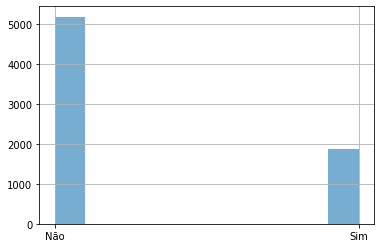

In [17]:
ax = dados.Evasao.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Genero

In [18]:
dados.Genero.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
dados.Genero.value_counts()

Male      3675
Female    3592
Name: Genero, dtype: int64

In [20]:
dic_sexo = {
    'Male' : 'Masculino',
    'Female' : 'Feminino'
}

dados.Genero = dados.Genero.map(dic_sexo)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


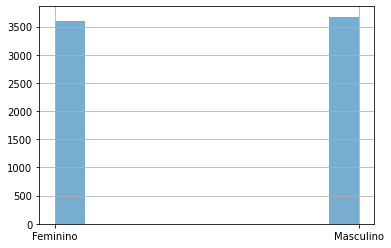

In [21]:
ax = dados.Genero.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Idoso

In [22]:
dados.Idoso.unique()

array([0, 1])

In [23]:
dados.Idoso.value_counts()

0    6085
1    1182
Name: Idoso, dtype: int64

In [24]:
dic_idoso = {
    0 : 'Não',
    1 : 'Sim'
}

dados.Idoso = dados.Idoso.map(dic_idoso)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


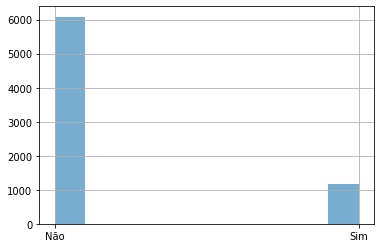

In [25]:
ax = dados.Idoso.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Parceiro

In [26]:
dados.Parceiro.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
dados.Parceiro.value_counts()

No     3749
Yes    3518
Name: Parceiro, dtype: int64

In [28]:
dados.Parceiro = dados.Parceiro.map(dic_sim_nao)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,Não,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,Não,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


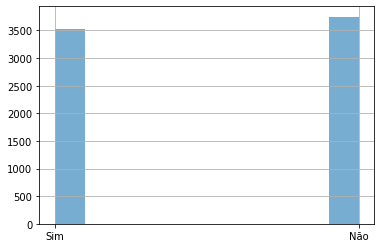

In [29]:
ax = dados.Parceiro.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Dependentes

In [30]:
dados.Dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [31]:
dados.Dependentes.value_counts()

No     5086
Yes    2181
Name: Dependentes, dtype: int64

In [32]:
dados.Dependentes = dados.Dependentes.map(dic_sim_nao)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


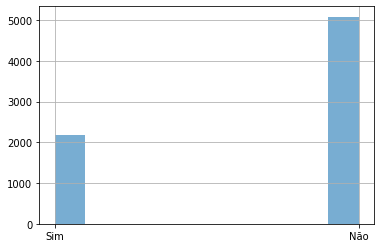

In [33]:
ax = dados.Dependentes.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Meses_contrato

In [34]:
dados.Meses_contrato.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [35]:
dados.Meses_contrato.describe().round(2)

count    7267.00
mean       32.35
std        24.57
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: Meses_contrato, dtype: float64

Vemos aqui que os clientes de maior tempo na companhia são de 6 anos.

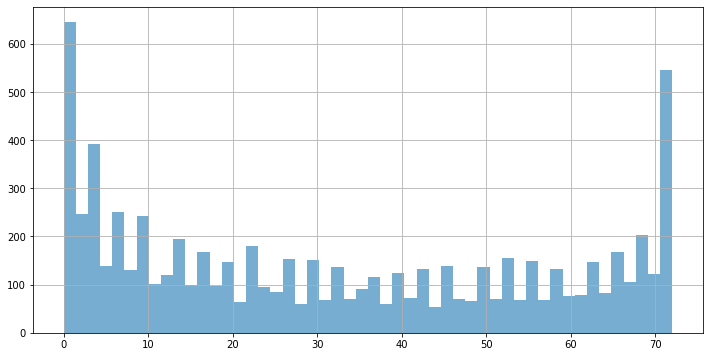

In [36]:
ax = dados.Meses_contrato.hist(alpha = 0.6, bins = 50, figsize=(12,6))
ax

#### Coluna Servico_telefonia

In [37]:
dados.Servico_telefonia.unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dados.Servico_telefonia.value_counts()

Yes    6560
No      707
Name: Servico_telefonia, dtype: int64

In [39]:
dados.Servico_telefonia = dados.Servico_telefonia.map(dic_sim_nao)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


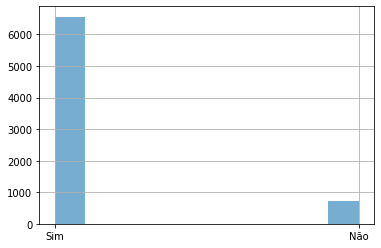

In [40]:
ax = dados.Servico_telefonia.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Multiplas_linhas

In [41]:
dados.Multiplas_linhas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [42]:
dados.Multiplas_linhas.value_counts()

No                  3495
Yes                 3065
No phone service     707
Name: Multiplas_linhas, dtype: int64

In [43]:
dic_telefones = {
    'No' : 'Não',
    'Yes' : 'Sim',
    'No phone service' : 'Sem serviço de telefonia'
}

dados.Multiplas_linhas = dados.Multiplas_linhas.map(dic_telefones)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


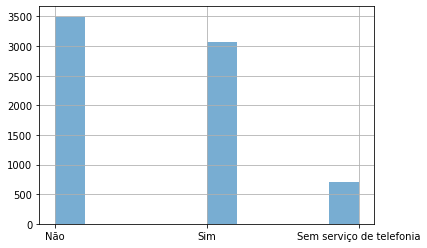

In [44]:
ax = dados.Multiplas_linhas.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Servico_internet

In [45]:
dados.Servico_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [46]:
dados.Servico_internet.value_counts()

Fiber optic    3198
DSL            2488
No             1581
Name: Servico_internet, dtype: int64

In [47]:
dic_internet = {
    'DSL' : 'DSL',
    'Fiber optic' : 'Fibra optica',
    'No' : 'Não'
}

dados.Servico_internet = dados.Servico_internet.map(dic_internet)
dados.head(3)

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra optica,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


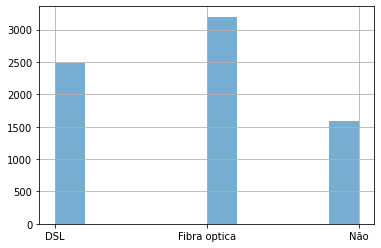

In [48]:
ax = dados.Servico_internet.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Seguranca_online

In [49]:
dados.Seguranca_online.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [50]:
dados.Seguranca_online.value_counts()

No                     3608
Yes                    2078
No internet service    1581
Name: Seguranca_online, dtype: int64

In [51]:
dic_internet2 = {
    'No' : 'Não',
    'Yes' : 'Sim',
    'No internet service' : 'Sem serviço de Internet'
}

dados.Seguranca_online = dados.Seguranca_online.map(dic_internet2)
dados.Seguranca_online.head()

0    Não
1    Não
2    Não
3    Não
4    Não
Name: Seguranca_online, dtype: object

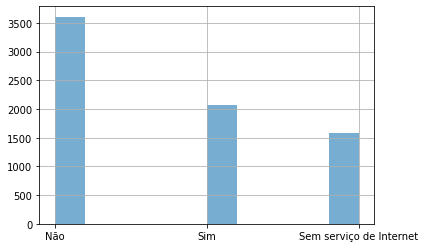

In [52]:
ax = dados.Seguranca_online.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Backup_online

In [53]:
dados.Backup_online.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [54]:
dados.Backup_online.value_counts()

No                     3182
Yes                    2504
No internet service    1581
Name: Backup_online, dtype: int64

In [55]:
dados.Backup_online = dados.Backup_online.map(dic_internet2)
dados.Backup_online.head()

0    Sim
1    Não
2    Não
3    Sim
4    Não
Name: Backup_online, dtype: object

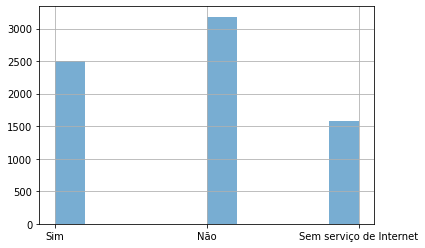

In [56]:
ax = dados.Backup_online.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Protecao_dispositivo

In [57]:
dados.Protecao_dispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [58]:
dados.Protecao_dispositivo.value_counts()

No                     3195
Yes                    2491
No internet service    1581
Name: Protecao_dispositivo, dtype: int64

In [59]:
dados.Protecao_dispositivo = dados.Protecao_dispositivo.map(dic_internet2)
dados.Protecao_dispositivo.head()

0    Não
1    Não
2    Sim
3    Sim
4    Não
Name: Protecao_dispositivo, dtype: object

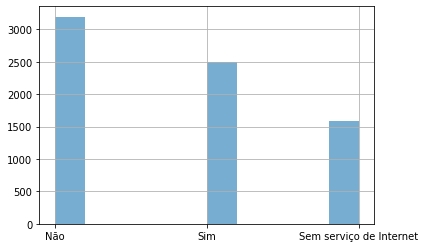

In [60]:
ax = dados.Protecao_dispositivo.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Suporte_tecnico

In [61]:
dados.Suporte_tecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [62]:
dados.Suporte_tecnico.value_counts()

No                     3582
Yes                    2104
No internet service    1581
Name: Suporte_tecnico, dtype: int64

In [63]:
dados.Suporte_tecnico = dados.Suporte_tecnico.map(dic_internet2)
dados.Suporte_tecnico.head()

0    Sim
1    Não
2    Não
3    Não
4    Sim
Name: Suporte_tecnico, dtype: object

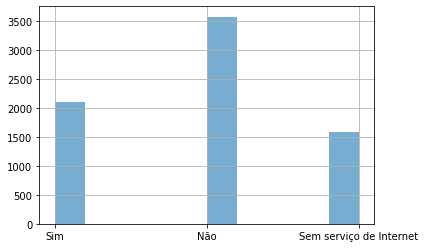

In [64]:
ax = dados.Suporte_tecnico.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Tv_a_cabo

In [65]:
dados.Tv_a_cabo.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [66]:
dados.Tv_a_cabo.value_counts()

No                     2896
Yes                    2790
No internet service    1581
Name: Tv_a_cabo, dtype: int64

In [67]:
dados.Tv_a_cabo = dados.Tv_a_cabo.map(dic_internet2)
dados.Tv_a_cabo.head()

0    Sim
1    Não
2    Não
3    Sim
4    Sim
Name: Tv_a_cabo, dtype: object

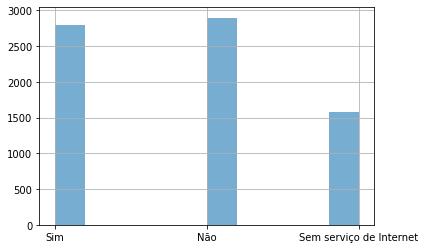

In [68]:
ax = dados.Tv_a_cabo.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Streaming_filmes

In [69]:
dados.Streaming_filmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [70]:
dados.Streaming_filmes.value_counts()

No                     2870
Yes                    2816
No internet service    1581
Name: Streaming_filmes, dtype: int64

In [71]:
dados.Streaming_filmes = dados.Streaming_filmes.map(dic_internet2)
dados.Streaming_filmes.head()

0    Não
1    Sim
2    Não
3    Sim
4    Não
Name: Streaming_filmes, dtype: object

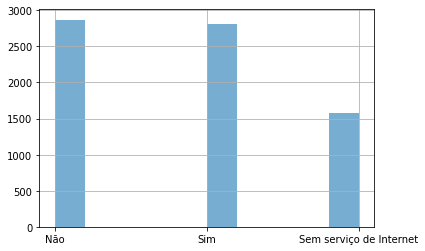

In [72]:
ax = dados.Streaming_filmes.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Tipo_contrato

In [73]:
dados.Tipo_contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [74]:
dados.Tipo_contrato.value_counts()

Month-to-month    4005
Two year          1743
One year          1519
Name: Tipo_contrato, dtype: int64

In [75]:
dic_contrato = {
   'Month-to-month' : 'Mensal',
    'Two year' : 'Dois anos',
    'One year' : 'Um ano'
}

dados.Tipo_contrato = dados.Tipo_contrato.map(dic_contrato)
dados.Tipo_contrato.head()

0    Um ano
1    Mensal
2    Mensal
3    Mensal
4    Mensal
Name: Tipo_contrato, dtype: object

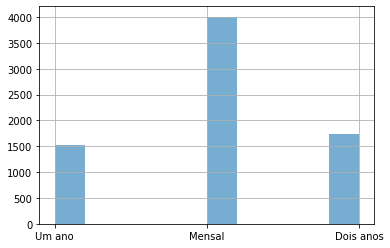

In [76]:
ax = dados.Tipo_contrato.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Fatura_digital

In [77]:
dados.Fatura_digital.unique()

array(['Yes', 'No'], dtype=object)

In [78]:
dados.Fatura_digital.value_counts()

Yes    4311
No     2956
Name: Fatura_digital, dtype: int64

In [79]:
dados.Fatura_digital = dados.Fatura_digital.map(dic_sim_nao)
dados.Fatura_digital.head()

0    Sim
1    Não
2    Sim
3    Sim
4    Sim
Name: Fatura_digital, dtype: object

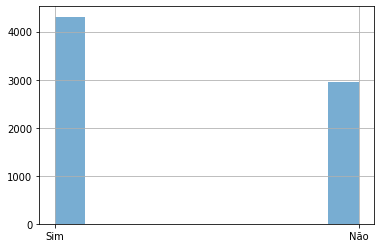

In [80]:
ax = dados.Fatura_digital.hist(alpha = 0.6, figsize=(6,4))
ax

#### Coluna Forma_pagamento

In [81]:
dados.Forma_pagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [82]:
dados.Forma_pagamento.value_counts()

Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: Forma_pagamento, dtype: int64

In [83]:
dic_forma_pgto = {
    'Electronic check' : 'Pagamento eletrônico',
    'Mailed check' : 'Boleto',
    'Bank transfer (automatic)' : 'Transferência bancária (automático)',
    'Credit card (automatic)' : 'Cartão de crédito (automático)'
}

dados.Forma_pagamento = dados.Forma_pagamento.map(dic_forma_pgto)
dados.Forma_pagamento.head()

0                  Boleto
1                  Boleto
2    Pagamento eletrônico
3    Pagamento eletrônico
4                  Boleto
Name: Forma_pagamento, dtype: object

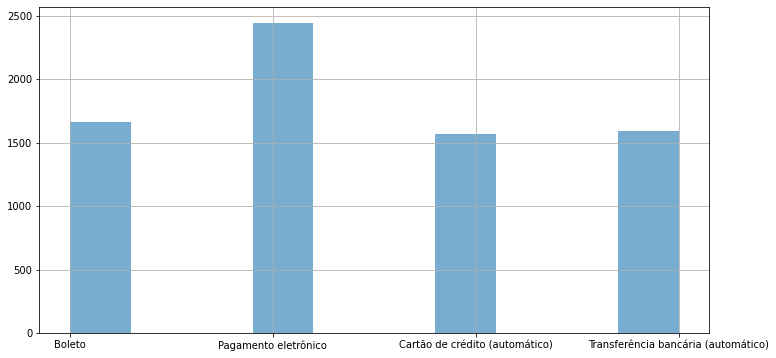

In [84]:
ax = dados.Forma_pagamento.hist(alpha = 0.6, figsize=(12,6))
ax

#### Coluna Pagamento_mensal

In [85]:
dados.Pagamento_mensal.describe()

count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Pagamento_mensal, dtype: float64

Vemos aqui que a assinatura mais barata é de 18.25 dolares e a mais cara 118.75 dolares.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


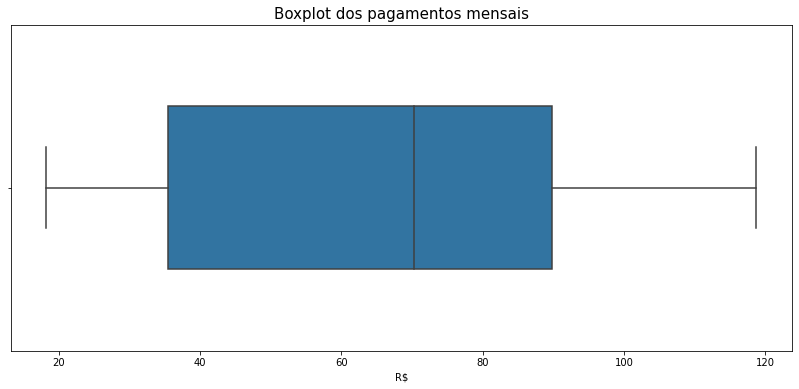

In [86]:
ax = sns.boxplot('Pagamento_mensal', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos mensais', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax

#### Coluna Pagamento_total

In [87]:
dados.Pagamento_total.describe()

count     7267
unique    6531
top           
freq        11
Name: Pagamento_total, dtype: object

In [88]:
dados.Pagamento_total = pd.to_numeric(dados.Pagamento_total, errors = 'coerce')

In [89]:
dados.Pagamento_total.isnull().sum()

11

In [90]:
dados = dados.dropna()
dados.Pagamento_total.isnull().sum()

0

In [91]:
dados.Pagamento_total.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Pagamento_total, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


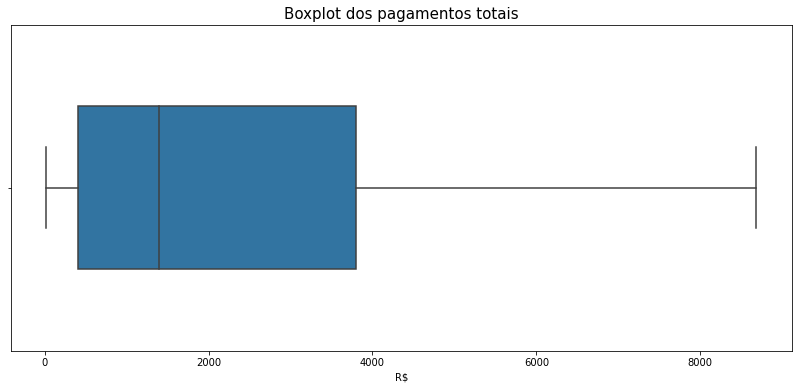

In [92]:
ax = sns.boxplot('Pagamento_total', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos totais', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax

###Criando coluna de contas diárias

In [93]:
dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Backup_online,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,Sim,Boleto,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Boleto,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra optica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Pagamento eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra optica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra optica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto,83.9,267.40


In [101]:
gasto_diario = (dados.Pagamento_mensal / 30).round(2)
dados.insert(19, 'Pagamento_diario', value = gasto_diario)
dados.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_contrato,Servico_telefonia,Multiplas_linhas,Servico_internet,...,Protecao_dispositivo,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Pagamento_diario,Pagamento_mensal,Pagamento_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Boleto,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Boleto,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra optica,...,Sim,Não,Não,Não,Mensal,Sim,Pagamento eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra optica,...,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra optica,...,Não,Sim,Sim,Não,Mensal,Sim,Boleto,2.80,83.9,267.40


In [102]:
dados.Pagamento_diario.describe()

count    7032.000000
mean        2.159891
std         1.002955
min         0.610000
25%         1.187500
50%         2.340000
75%         2.992500
max         3.960000
Name: Pagamento_diario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


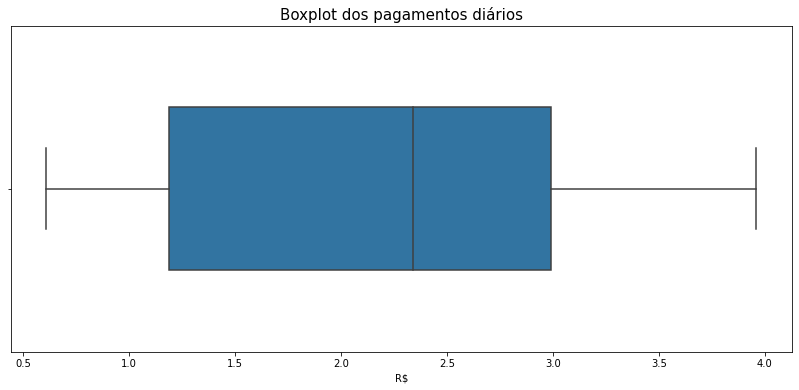

In [103]:
ax = sns.boxplot('Pagamento_diario', data = dados, width = 0.5)
ax.figure.set_size_inches(14,6)
ax.set_title('Boxplot dos pagamentos diários', fontsize = 15)
ax.set_xlabel('R$', fontsize = 10)
ax